A hydrocarbon mixture with the following overall composition is flashed in a separator at 50 psia and 100°F. Assuming an ideal solution behavior, perform flash calculations.

## COMPOSITIONAL DATA (FEED)

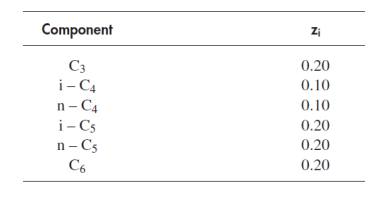

## COX CHART

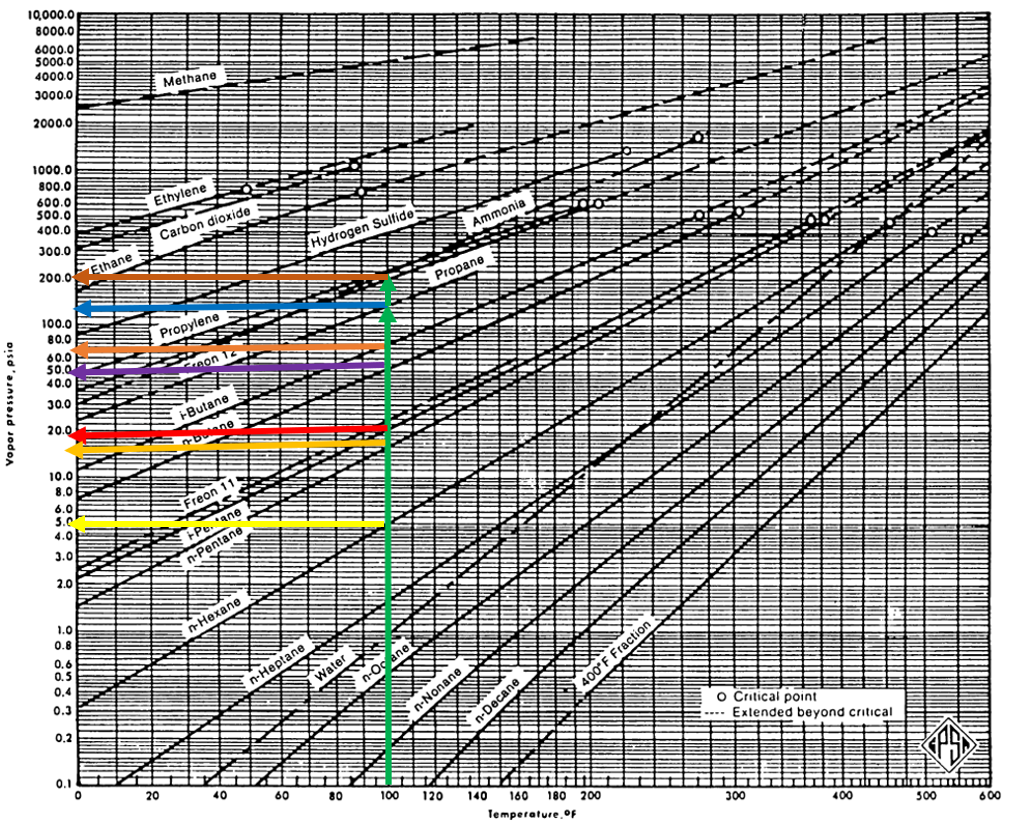

## DESCRIPTION

Phase equilibrium calculation, also known as flash calculation, has been extensively applied in petroleum engineering, not only as a standalone application for separation process but also an integral component of compositional reservoir simulation. Flash calculations are an integral part of all reservoir and process engineering calculations. They are required whenever it is desirable to know the amounts (in moles) of hydrocarbon liquid and gas coexisting in a reservoir or a vessel at a given pressure and temperature. These calculations also are performed to determine the composition of the existing hydrocarbon phases.

## PROBLEM STATEMENT

Results of the flash separation test are essentially important. It could be appropriately combined with PVT tests such as Differntial Liberation and it provides a means of obtaining the PVT parameters (Bo, Rs, and Bt) required for further petroleum engineering calculations such as reserves estimation, compositional analysis and equipment sizing.

## DATA

In [30]:
import numpy as np
import pandas as pd

T = 100 #F - Input temperature of the feed
P = 50 #psia - Input Pressure of the feed

zi = np.array([0.2, 0.1, 0.1, 0.2, 0.2, 0.2]) # Molar composition of the feed
pi = np.array([190, 72, 51, 20, 16, 4.9]) # Critical Pressure of each component. The Cox Chart was used to determine these values.

## CALCULATIONS

In [31]:
ki = pi/50 # Equilibrium ratio of the feed stream. Raoult's Law and Dalton's Law are equal because of the low input pressure (100 psia)

In [32]:
# The Rachford-Rice Equation is used by using the Newton-Raphson numerical scheme

def f(n):
    return np.sum((zi*(ki-1))/((n*(ki-1)) + 1)) # The equation in terms of nv or V
def df(n):
    return -np.sum((zi*((ki-1)**2))/((n*(ki-1) + 1)**2)) # The first derivative of the Rachford-Rice Equation
def NR(n0):
    s = 1
    m = 1
    cond = True
    while cond:
        global n1
        n1 = n0 - f(n0)/df(n0) # Newton Raphson Numerical Scheme
        print('%d n1 = %0.7f, f(n1) = %0.9f' % (s, n1, f(n1)))
        n0 = n1
        s = s + 1
        if s > 10:
            m = 0
            break

        cond = f(n1) > 10**-6 # Preset tolerance for convergence
    print('Total number of moles of gas phase: %0.7f' % n1)


In [33]:
n0 = np.sum(zi*(ki-1))/(np.sum(zi*(ki-1))+np.sum(zi*(1/ki-1)))

NR(n0)

1 n1 = 0.1049114, f(n1) = 0.003139854
2 n1 = 0.1072506, f(n1) = 0.000009276
3 n1 = 0.1072575, f(n1) = 0.000000000
Total number of moles of gas phase: 0.1072575


In [34]:
nl = 1 - n1

xi = zi/(nl+n1*ki)
yi = xi*ki

In [39]:
my_array = np.array([zi, ki, xi, yi])

df = pd.DataFrame(my_array, columns = ['C3', 'i-C4', 'n-C4', 'i-C5', 'n-C5', 'C6'], index = ['zi', 'ki', 'xi=zi/(0.8927425+0.1072575ki)', 'yi=xiki'])
df1_transposed = df.T

df1_transposed

,zi,ki,xi=zi/(0.8927425+0.1072575ki),yi=xiki
C3,0.2,3.800,0.153808,0.584471
i-C4,0.1,1.440,0.095493,0.137510
n-C4,0.1,1.020,0.099786,0.101782
i-C5,0.2,0.400,0.213756,0.085502
n-C5,0.2,0.320,0.215735,0.069035
C6,0.2,0.098,0.221422,0.021699
